<a href="https://colab.research.google.com/github/Bambillo1/elecomsCoding_academy/blob/main/Copy_of_Energy_Theft_with_Convolutional_Neural_Network_and_Ensemble_RandomForestClassifier_using_SMOTE_for_imbalanced_data_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import imblearn
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import (auc, confusion_matrix, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve)
!pip install plot-metric
from plot_metric.functions import BinaryClassification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import Flatten
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from numpy import loadtxt
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger, LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.metrics import binary_crossentropy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
!pip install plot-keras-history
from tensorflow.keras.callbacks import ModelCheckpoint
from plot_keras_history import plot_history
from tensorflow. keras.utils import plot_model
from tabulate import tabulate


Instructions for updating:
non-resource variables are not supported in the long term


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9455 sha256=7caf542944c614c3b75dd19208cf1c9686fe6400439db0e0404215f18371f754
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=6ca551ee34d21c3c35d90663d2d072bccb176157f2d9531bf82515acdc3f41ae
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=3dfa7ac783fb0cacde871d87cc6fcd680b76fbfa36b40d6e56727c928a98c139
  Stored in directo

#Using google drive to import dataset into colab

In [ ]:
#Using google drive to import dataset into colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!gdown --id 1pTpBfO1CwStFodOtIn_uzzNOWpAmQn_8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pTpBfO1CwStFodOtIn_uzzNOWpAmQn_8
To: /content/data.csv
100% 175M/175M [00:07<00:00, 23.4MB/s]


# Web link from google drive that links dataset to this colab

In [ ]:
#link from google drive that links dataset to this colab
#!gdown  --id 1OIz8U3aymDeGDUIl83vyTFCPyfLulSgM

#Data Exploration

##EDA

###Using pandas read_csv module to read in data

In [ ]:
#Using pandas read_csv module to read in data
df = pd.read_csv('data.csv')

In [ ]:
#Check first 10 rows of the dataframe df
df.head(10)

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
5,6BCFD78138BC72A9BA1BFB0B79382192,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
6,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
7,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
8,D0A186208CE83FBCCF730857C9A75B6F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.36,3.41,4.73,3.54,4.20,2.77,3.02,4.06,4.75,4.86
9,516954F5FF177CE314656D727FCC66A5,1,11.02,8.24,7.94,7.92,8.31,7.39,8.27,8.05,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


In [ ]:
df.iloc[30010, 1:]

FLAG             0
2014/1/1       NaN
2014/1/10      NaN
2014/1/11      NaN
2014/1/12      NaN
             ...  
2016/9/5     29.86
2016/9/6     28.36
2016/9/7     25.77
2016/9/8     23.24
2016/9/9     25.58
Name: 30010, Length: 1035, dtype: object

In [ ]:
# @title Default title text
#Proportion of flag (1) and not flag(0)

num_Flagged = df[df['FLAG'] == 1].shape[0]
num_unflagged = df[df['FLAG'] == 0].shape[0]

In [ ]:
num_Flagged

3615

In [ ]:
num_unflagged

38757

In [ ]:
#Print proportion of flagged and unflagged customers in the whole data
print(num_Flagged / (num_Flagged + num_unflagged) * 100, '% of customers flagged.')

print(num_unflagged / (num_Flagged + num_unflagged) * 100, '% of customers unflagged.')

8.531577456811101 % of customers flagged.
91.4684225431889 % of customers unflagged.


In [ ]:
#Print proportion of flagged and unflagged customers in the whole data
print(f'{num_Flagged} customers flagged.')

print(f'{num_unflagged} customers unflagged.')

3615 customers flagged.
38757 customers unflagged.


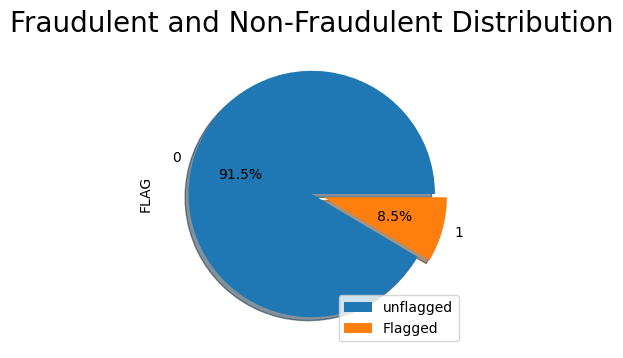

In [ ]:
#Visualize the proportion with a pie chart
df["FLAG"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(4, 4),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["unflagged", "Flagged"])
plt.show()

<Axes: ylabel='FLAG'>

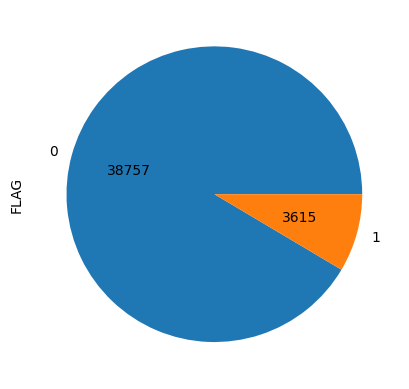

In [ ]:
flags = df['FLAG'].value_counts()

flags.plot.pie(autopct=lambda x: '{:.0f}'.format(x*flags.sum()/100) )


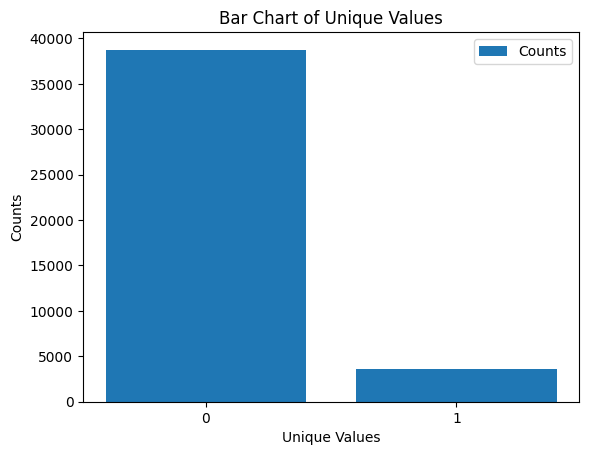

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = df['FLAG']
unique, counts = np.unique(y, return_counts=True)
positions = np.arange(len(unique))

# Create the bar chart with labels
plt.bar(positions, counts, label='Counts')
plt.xticks(positions, unique)
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Bar Chart of Unique Values')

# Create a legend
plt.legend()

plt.show()



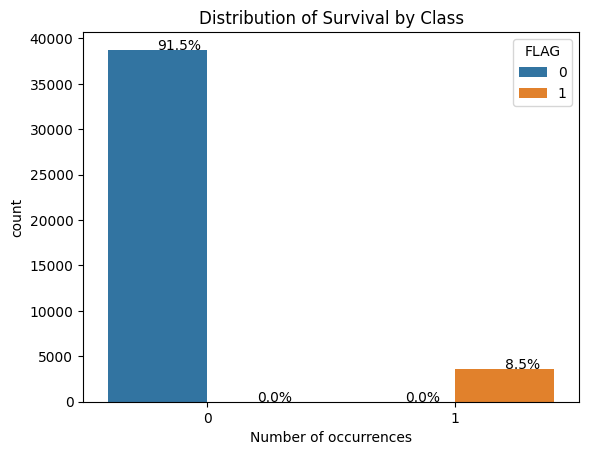

In [ ]:
# Create the countplot
ax = sns.countplot(x='FLAG', data=df, hue='FLAG')

plt.title('Distribution of Survival by Class')
plt.xlabel('Number of occurrences')

total = len(df['FLAG'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2  # Corrected the x position calculation
    y = p.get_y() + p.get_height() + 10  # Adjusted the y position

    ax.annotate(percentage, (x, y))

plt.show()

In [ ]:
#Function that looks for missing values in df
def missing_data_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


In [ ]:
# Invoking function missing data
missing_data_all(df)


,Total,Percent
2014/10/3,42357,0.999646
2014/3/19,21505,0.507529
2014/2/28,20985,0.495256
2014/3/4,20820,0.491362
2014/3/3,20806,0.491032
...,...,...
2016/9/11,364,0.008591
2016/9/9,345,0.008142
2016/9/8,328,0.007741
FLAG,0,0.000000


import datetime

# Select columns excluding 'CONS_NO' and 'FLAG'
columns_to_select = [col for col in df.columns if col not in ['CONS_NO', 'FLAG']]

# Check if there is a null value at row 0 and column 2
is_null_value = math.isnan(df.iloc[0, 2])

# Convert column names from date format
column_dates = [datetime.datetime.strptime(date, "%Y/%m/%d") for date in columns_to_select]
formatted_dates = [datetime.datetime.strftime(date, "%Y/%m/%d") for date in column_dates]

# Insert 'FLAG' and 'CONS_NO' at the beginning of the column names
formatted_dates.insert(0, "FLAG")
formatted_dates.insert(0, "CONS_NO")

# Update the DataFrame columns with formatted dates
df.columns = formatted_dates

# Sort and reorganize columns
sorted_dates = sorted(formatted_dates[2:])  # Excluding 'FLAG' and 'CONS_NO'
selected_columns = formatted_dates[:2] + sorted_dates
df = df[selected_columns]

# Data manipulation for specific columns
df_1 = df.copy()  # Create a copy of the DataFrame

# Example for data manipulation in columns "2014/01/01" and "2014/01/02"
col_2014_01_01 = df["2014/01/01"]
col_2014_01_02 = df["2014/01/02"]
col_2014_01_01 = np.asarray(col_2014_01_01).tolist()
col_2014_01_02 = np.asarray(col_2014_01_02).tolist()

result_column = []
for i in range(len(col_2014_01_01):
    if math.isnan(col_2014_01_01[i]):
        if math.isnan(col_2014_01_02[i]):
            result_column.append(0)
        else:
            result_column.append(col_2014_01_02[i] / 2)
    else:
        result_column.append(col_2014_01_01[i])

df_1["2014/01/01"] = result_column

# Repeat the same data manipulation for another column (e.g., "2016/10/31")

# Select columns for further processing
selected_columns = [col for col in df.columns if col not in ['CONS_NO', 'FLAG']]


In [ ]:
#Aside 'CONS_NO','FLAG' columns, append other columns of df in a list named lb
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)


In [ ]:
#Check  if item in row 0 and column 2 is having a null value
math.isnan(df.iloc[0][2])

True

In [ ]:
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)


In [ ]:
import datetime
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
#dates.sort()
fdatesdates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

In [ ]:
fdatesdates.insert(0,"FLAG")
fdatesdates.insert(0,"CONS_NO")

df.columns=fdatesdates

In [ ]:
import datetime
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]


In [ ]:
cols=df.columns.tolist()[0:2]+sorteddates
df=df[cols]


In [ ]:
df_1=df
l=df["2014/01/01"]
l1=df["2014/01/02"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()

l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df_1["2014/01/01"]=l2

df_1.head()
l=df["2016/10/31"]
l1=df["2016/10/30"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()

l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df_1["2016/10/31"]=l2


l=df.columns
la=['CONS_NO','FLAG']
lbx=[]
for i in l:
    if i not in la:
        lbx.append(i)





In [ ]:
df_1=df_1.interpolate(method ='linear', limit_direction ='forward')
df_1=df_1.interpolate(method ='linear', limit_direction ='backward')


In [ ]:
df_1.head()

,CONS_NO,FLAG,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.0,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.0,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.0,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.0,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [ ]:
def missing_data_all(df):
    overall = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([overall, percentage], axis=1, keys=['Overall', 'Percentage'])
    return missing_data

missing_data_all(df_1)

,Overall,Percentage
CONS_NO,0,0.0
2015/12/12,0,0.0
2015/11/12,0,0.0
2015/11/13,0,0.0
2015/11/14,0,0.0
...,...,...
2014/12/15,0,0.0
2014/12/16,0,0.0
2014/12/17,0,0.0
2014/12/18,0,0.0


#Data splitting into features and target

In [ ]:


X = df_1.drop(['CONS_NO', 'FLAG'], axis = 1)

Y = df_1.iloc[:, 1]

pd.DataFrame(X)




,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,2014/01/09,2014/01/10,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,0.00,5.64,6.99,3.32,3.610000,5.35,4.730000,3.680000,3.530000,3.420000,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.00,5.64,6.99,3.32,3.610000,5.35,4.730000,3.680000,3.530000,3.420000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,5.64,6.99,3.32,3.610000,5.35,4.730000,3.680000,3.530000,3.420000,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,0.00,5.64,6.99,3.32,3.610000,5.35,4.730000,3.680000,3.530000,3.420000,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.90,5.64,6.99,3.32,3.610000,5.35,4.730000,3.680000,3.530000,3.420000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0.00,1.68,1.64,5.44,8.563333,7.45,3.646667,4.806667,6.143333,2.926667,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
42368,2.70,0.00,0.00,5.72,6.050000,5.81,3.070000,4.040000,5.680000,4.390000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0.58,1.16,0.92,0.98,1.540000,1.38,0.890000,0.700000,1.230000,0.840000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,16.89,15.15,19.28,17.19,16.800000,17.48,17.860000,23.990000,12.340000,13.840000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


Using MinMaxScaler to scale down values ranging 0 to 1

In [ ]:

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)


[[0.00000000e+00 2.25600000e-03 2.61406133e-03 ... 5.34751773e-04
  7.33974359e-04 6.74674675e-04]
 [0.00000000e+00 2.25600000e-03 2.61406133e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.25600000e-03 2.61406133e-03 ... 1.15248227e-03
  1.13782051e-03 1.36736737e-03]
 ...
 [1.74804099e-04 4.64000000e-04 3.44053852e-04 ... 4.68085106e-05
  3.12500000e-05 6.50650651e-05]
 [5.09041591e-03 6.06000000e-03 7.21017203e-03 ... 9.33333333e-04
  1.06810897e-03 1.04004004e-03]
 [0.00000000e+00 6.06000000e-03 7.21017203e-03 ... 8.15602837e-04
  5.73717949e-04 5.25525526e-04]]


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.000000,0.002256,0.002614,0.000586,0.000744,0.001283,0.000664,0.001038,0.000799,0.000862,...,0.000631,0.000727,0.000597,0.000798,0.000439,0.000576,0.000621,0.000535,0.000734,0.000675
1,0.000000,0.002256,0.002614,0.000586,0.000744,0.001283,0.000664,0.001038,0.000799,0.000862,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.002256,0.002614,0.000586,0.000744,0.001283,0.000664,0.001038,0.000799,0.000862,...,0.000963,0.001617,0.001315,0.001450,0.001718,0.001258,0.001240,0.001152,0.001138,0.001367
3,0.000000,0.002256,0.002614,0.000586,0.000744,0.001283,0.000664,0.001038,0.000799,0.000862,...,0.001127,0.001362,0.001273,0.001249,0.001570,0.001370,0.001199,0.001366,0.001159,0.001173
4,0.000874,0.002256,0.002614,0.000586,0.000744,0.001283,0.000664,0.001038,0.000799,0.000862,...,0.001250,0.000921,0.000625,0.000512,0.000489,0.000443,0.000502,0.000772,0.000790,0.000873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0.000000,0.000672,0.000613,0.000959,0.001764,0.001787,0.000512,0.001356,0.001391,0.000738,...,0.000288,0.000279,0.000203,0.000252,0.000240,0.000186,0.000170,0.000241,0.000288,0.000254
42368,0.000814,0.000000,0.000000,0.001009,0.001246,0.001393,0.000431,0.001139,0.001286,0.001107,...,0.000338,0.000596,0.000230,0.000432,0.000290,0.000306,0.000248,0.000441,0.000485,0.000477
42369,0.000175,0.000464,0.000344,0.000173,0.000317,0.000331,0.000125,0.000197,0.000279,0.000212,...,0.000087,0.000055,0.000048,0.000046,0.000039,0.000034,0.000053,0.000047,0.000031,0.000065
42370,0.005090,0.006060,0.007210,0.003032,0.003461,0.004192,0.002508,0.006765,0.002794,0.003490,...,0.001376,0.001485,0.000962,0.000870,0.000962,0.000735,0.000816,0.000933,0.001068,0.001040


Using SMOTE technique to oversample minority class

In [ ]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize SMOTE with a random state
ros = SMOTE(random_state=42)

# Resample the data and split into train and test sets
X_resampled, Y_resampled = ros.fit_resample(X, Y.ravel())
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Convert oversampled y_train and y_test into NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Expand x_train and x_test dimensions and insert the extended dimension at index 2
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
input_shape = x_train.shape[1]  # input_shape takes the value of the column index











#ros = SMOTE(random_state= 42)
#X, Y = ros.fit_resample(X, Y.ravel())
#x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state = 42)

#Convert oversampled y_train and y_test into numpy array
#y_train = np.array(y_train)
#y_test = np.array(y_test)

#Expand x_train, x_test dimension and insert the extended dimension at index 2
#x_train = np.expand_dims(x_train, axis=2)
#x_test = np.expand_dims(x_test, axis=2)
#input_shape=x_train.shape[1] # input_shape takes the value of the column index



In [ ]:
x_train.shape[1] #to extract column array but x_train.shape[0] is to extract the row array

1034

In [ ]:
x_train.shape

(54259, 1034, 1)

#Check shapes of all divisions

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((54259, 1034, 1), (23255, 1034, 1), (54259,), (23255,))

In [ ]:
input_shape=x_train.shape[1]

In [ ]:
print(input_shape)

1034


##Building CNN model with CONV1D of 32 neurons at the input layer
input_shape is (1034,1)
Dropout is 40% of the neurons dropped
Hidden layer has a dense layer of 64 neurons

In [ ]:

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Input
from tensorflow.keras.initializers import he_uniform

# Initialize a Sequential model
model_cnn = Sequential()

# Add Convolutional layer with 32 filters
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(x_train.shape[1], 1)))

# Add Flatten layer
model_cnn.add(Flatten())

# Create an Input layer
inputs = Input(shape=(x_train.shape[1], 1))

# Connect the Flatten layer to a Dense layer
m = Dense(64, activation='relu', kernel_initializer=he_uniform())(model_cnn(inputs))

# Apply Dropout
m = Dropout(0.4)(m)

# Create the final prediction layer
prediction_layer = Dense(1, activation='sigmoid')(m)

# Build the model
model_cnn_1 = Model(inputs=inputs, outputs=prediction_layer)

# Compile the model
model_cnn_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_cnn_1.summary()








Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1034, 1)]         0         
                                                                 
 sequential (Sequential)     (None, 33088)             128       
                                                                 
 dense (Dense)               (None, 64)                2117696   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2117889 (8.08 MB)
Trainable params: 2117889 (8.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the model with train data and validate the model with 30% validation data

In [ ]:
history = model_cnn_1.fit(x_train, y_train, epochs=50, batch_size=30, verbose=0,validation_split=0.3)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Make prediction using x_test

In [ ]:
cnn_prediction=model_cnn_1.predict(x_test);

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Rename cnn_prediction as resampled_prediction

In [ ]:
resampled_prediction = cnn_prediction

In [ ]:
resampled_prediction.shape

(23255, 1)

Plot confusion matrix for the CNN model

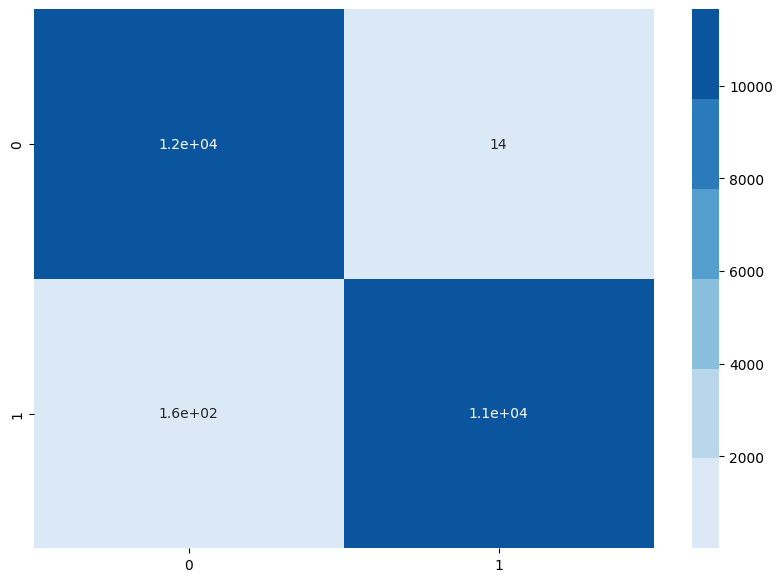

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute the confusion matrix
cmx_data = confusion_matrix(y_test, resampled_prediction.round())

# Get unique labels from y_test
labels = sorted(list(set(y_test)))

# Create a DataFrame for the confusion matrix
df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

# Set up the figure size and colormap
plt.figure(figsize=(10, 7))
colormap = sns.color_palette("Blues")

# Create a heatmap
sns.heatmap(df_cmx, annot=True, cmap=colormap)

# Display the plot
plt.show()


Determining precision and recall values for CNN Model


Precision: [0.49825844 0.49875172 0.49877319 ... 1.         1.         1.        ]
Recall: [1.         1.         1.         ... 0.97825149 0.97799258 0.        ]


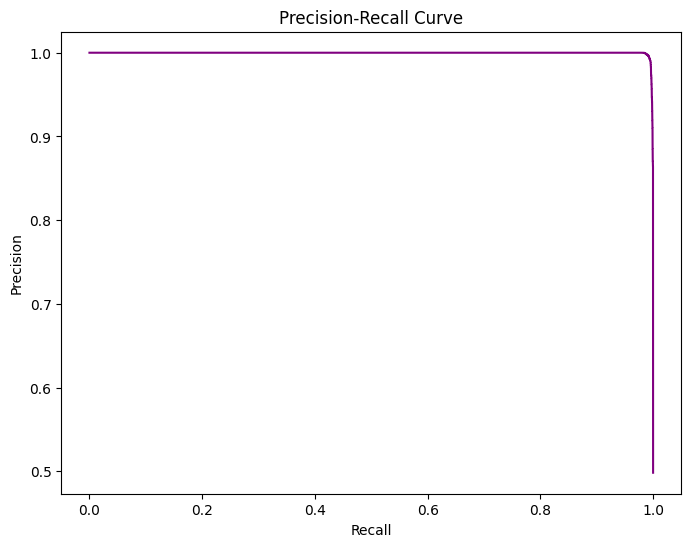

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, resampled_prediction)
print(f'Precision: {precision}\nRecall: {recall}')
# Create a precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')

# Add axis labels and a title
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Display the plot
plt.show()





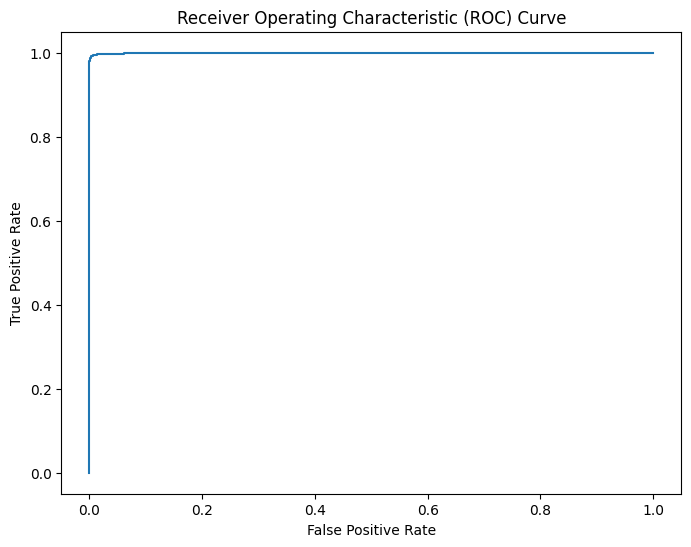

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, resampled_prediction)

# Create the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Display the plot
plt.show()


In [ ]:
from scipy import interpolate
fpr, tpr, thresholds = roc_curve(y_test, resampled_prediction)
tpr_intrp = interpolate.interp1d(thresholds, tpr)
fpr_intrp= interpolate.interp1d(thresholds, fpr)

print(f'TPR of CNN model : {tpr_intrp(0.5)}')
print(f'FPR of CNN model : {fpr_intrp(0.5)}')



TPR of CNN model : 0.9866229395011651
FPR of CNN model : 0.0012751049365098779


In [ ]:
# Visualisation with plot_metric
fpr, tpr, thresholds = roc_curve(y_test, resampled_prediction)
#print(f'CNN FPR: {fpr}\nTPR:{tpr}\nThresholds:{thresholds}')
auc_value = auc(fpr,tpr)
print(f'AUC score for CNN is:   {auc_value}')

bc = BinaryClassification(y_test, resampled_prediction, labels=[1, 0])

# Figures
plt.figure(figsize=(10,8))
bc.plot_roc_curve()
plt.show()

In [ ]:
threshold=0.5
for i in range(0,len(resampled_prediction)):

    if  resampled_prediction[i] > threshold:
        resampled_prediction[i] = 1
    else:
        resampled_prediction[i] = 0
print(classification_report(y_test, resampled_prediction))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11668
           1       1.00      0.99      0.99     11587

    accuracy                           0.99     23255
   macro avg       0.99      0.99      0.99     23255
weighted avg       0.99      0.99      0.99     23255



#Visualize accuracy in training data

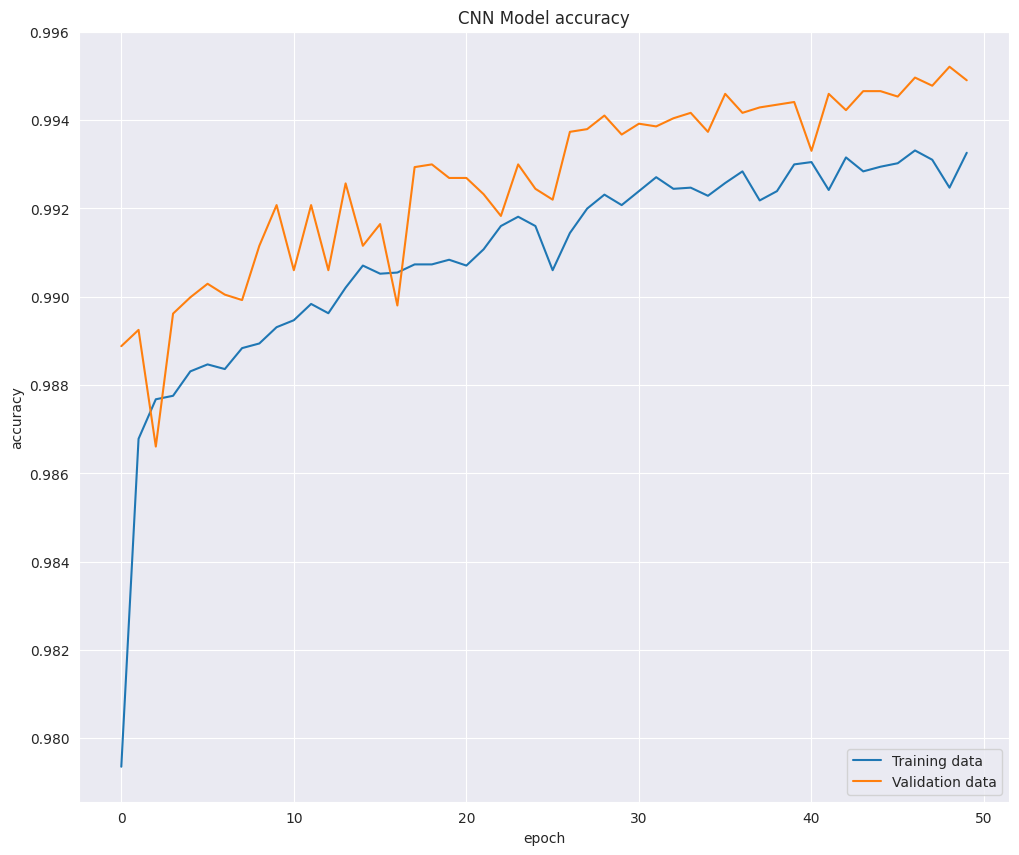

In [ ]:
#Visualize accuracy in training data
plt.figure(figsize = (12, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')

#Visualize loss in training data

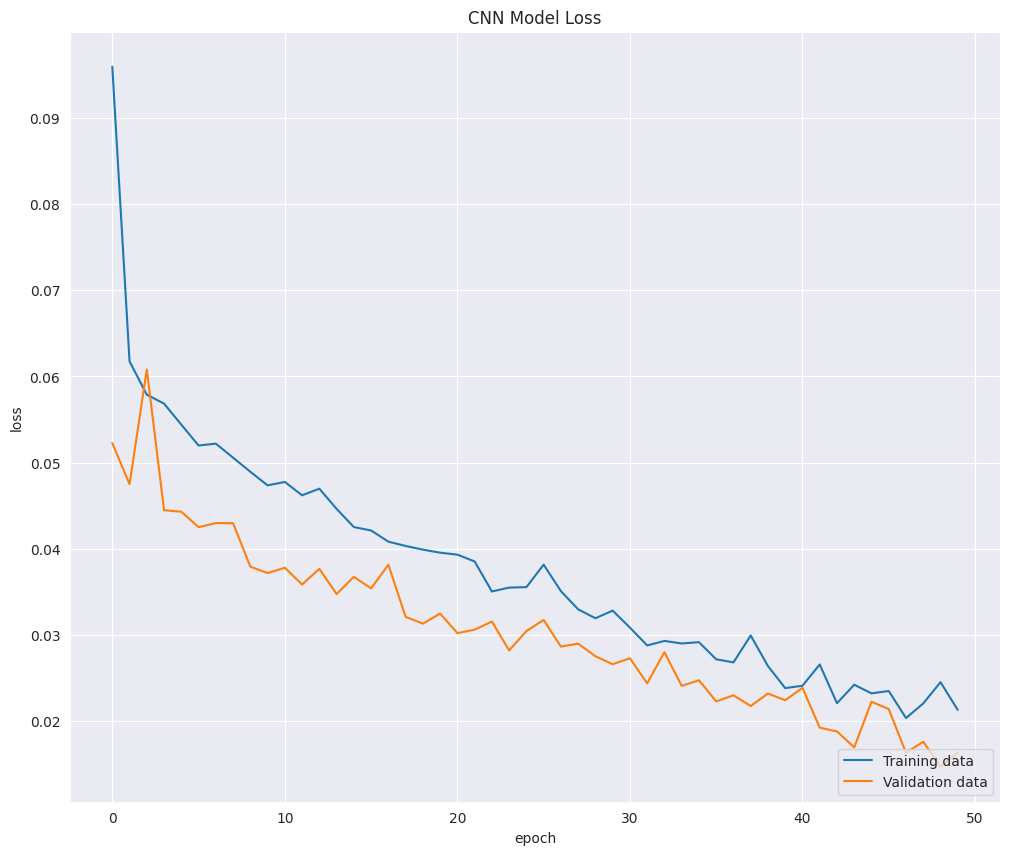

In [ ]:
#Visualize loss in training data
plt.figure(figsize = (12, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')

In [ ]:
input_data = df_1.iloc[30010, 2:]
print(input_data)
input_data_arr = np.asarray(input_data)
# Reshape the input data to (number_of_time_steps, number_of_features)
input_data_arr_reshaped = input_data_arr.reshape(1, -1, 1)
prediction_cnn = model_cnn_1.predict(input_data_arr_reshaped)
print(prediction_cnn)
#This will reshape your input data to match the expected input shape of your Conv1D model, which is a 2D shape (number_of_time_steps, number_of_features).







2014/01/01      0.0
2014/01/02     1.76
2014/01/03     1.61
2014/01/04     5.87
2014/01/05    3.015
              ...  
2016/10/27    17.46
2016/10/28    22.69
2016/10/29    18.39
2016/10/30    11.68
2016/10/31    15.26
Name: 30010, Length: 1034, dtype: object
[[0.]]


Using backend package from keras to extract some training data from CNN layers

In [ ]:
prediction_cnn[0]

array([0.], dtype=float32)

In [ ]:
if (prediction_cnn[0]== 1):
   print("This customer is defaulting.")
else:
   print("This customer is not defaulting.")




This customer is not defaulting.


In [ ]:

from keras import backend as K
for l in range(len(model_cnn_1.layers)):
    print(l, model_cnn_1.layers[l])

0 <keras.src.engine.input_layer.InputLayer object at 0x792a8df74c40>
1 <keras.src.engine.sequential.Sequential object at 0x792a8df77910>
2 <keras.src.layers.core.dense.Dense object at 0x792a8ef49270>
3 <keras.src.layers.regularization.dropout.Dropout object at 0x792a8ef49630>
4 <keras.src.layers.core.dense.Dense object at 0x792a8ef49a20>


Check the features in the first layer of the CNN

In [ ]:
model_cnn_1.layers[0].input

<tf.Tensor 'input_1:0' shape=(?, 1034, 1) dtype=float32>

Find features to use for RF training

In [ ]:

findFeature = K.function([model_cnn.layers[0].input, K.learning_phase()], [model_cnn.layers[1].output])

# Extract samples as train data and test data from CNN layers

In [ ]:
train_example4000 = findFeature([x_train[:4000], 0])[0]# Extract 4000 samples as train data

test_example1500 = findFeature([x_test[:1500], 0])[0]# Extract 1500 samples as test data

#train_example4000 = findFeature([x_train[:4000], 0])[0]# Extract 4000 samples as train data

#test_example1500 = findFeature([x_test[:], 0])[0]# Extract 1500 samples as test data



In [ ]:
train_example4000.shape, test_example1500.shape

((4000, 33088), (1500, 33088))

#Convert 3d array back to 2d array for RF model

In [ ]:
#y_train4000 = y_train[:4000].reshape(y_train[:4000].shape[0],)#Reshape y as a vector of only 1 column

# Convert y_train to a 2D array
y_train4000 = y_train[:4000].reshape(4000, -1)

# Convert y_test to a 2D array
y_test1500 = y_test[:1500].reshape(1500, -1)

#y_test1500 = y_test[:1500]


In [ ]:
y_train4000.shape, y_test1500.shape

((4000, 1), (1500, 1))

#Check shapes of all train and test data extracted from CNN layers

In [ ]:
print(train_example4000.shape, test_example1500.shape, y_train4000.shape, y_test1500.shape)

(4000, 33088) (1500, 33088) (4000, 1) (1500, 1)


#Instantiate RF Model and train with the samples extracted

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 50, random_state= 42)
rf.fit(train_example4000, y_train4000)

<ipython-input-65-15318ee9ea72>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_example4000, y_train4000)


RandomForestClassifier(n_estimators=50, random_state=42)

#Check performance of the RF model using test data extracted from CNN

---

layers

---



In [ ]:
y_test_rf = rf.predict(test_example1500)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test1500, y_test_rf))
print("Accuracy: {0}".format(accuracy_score(y_test1500, y_test_rf)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       764
           1       1.00      0.98      0.99       736

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

Accuracy: 0.992


In [ ]:
# Evaluate the model on the test data
accuracy = rf.score(test_example1500, y_test1500)

print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.992


In [ ]:
labels = sorted(list(set(y_test)))
cmx_data = confusion_matrix(y_test1500, y_test_rf, labels=labels)

df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
plt.figure(figsize = (10,7))
colormap = sns.color_palette("Blues")
sns.heatmap(df_cmx, annot=True, cmap = colormap)
plt.show()

In [ ]:
from scipy import interpolate
fpr, tpr, thresholds = roc_curve(y_test1500, y_test_rf)
tpr_intrp = interpolate.interp1d(thresholds, tpr)
fpr_intrp= interpolate.interp1d(thresholds, fpr)

print(f'TPR of RF model : {tpr_intrp(0.5)}')
print(f'FPR of RF model : {fpr_intrp(0.5)}')


In [ ]:
thresholds = 0.5
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test1500, y_test_rf)
print(f'Precision: {precision}\nRecall: {recall}\nThresholds: {thresholds}')
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve OF RF')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
# Visualisation with plot_metric
false_positive_rate, true_positive_rate, _ = roc_curve(y_test1500, y_test_rf)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

pr, tpr, thresholds = roc_curve(y_test1500, y_test_rf)
tpr_intrp = interpolate.interp1d(thresholds, tpr)
fpr_intrp= interpolate.interp1d(thresholds, fpr)

print(f'TPR of RF model : {tpr_intrp(0.5)}')
print(f'FPR of RF model : {fpr_intrp(0.5)}')

bc = BinaryClassification(y_test1500, y_test_rf, labels=[1, 0])

# Figures
plt.figure(figsize=(10,8))
bc.plot_roc_curve()
plt.show()

In [ ]:
from sklearn.metrics import auc
print("roc_auc score is :  ",roc_auc_score(y_test1500, y_test_rf))

f1 = f1_score(y_test1500, y_test_rf)
print("f1 score is :  ",f1)

precision, recall, thresholds = precision_recall_curve(y_test1500, y_test_rf)
print(f'Precision: {precision}\nRecall: {recall}')
print("precision-recall curve array is :  ", precision_recall_curve(y_test1500, y_test_rf))

auc = auc(recall, precision)

print("precision-recall AUC score of RF is :  ", auc)

In [ ]:
y_test_rf.shape

#Infusion of CNN predictions and RF predictions

In [ ]:
y_test=y_test1500
resampled_prediction=y_test_rf

In [ ]:
#labels = sorted(list(y_test))
#cmx_data = confusion_matrix(y_test, resampled_prediction)
cmx_data = confusion_matrix(y_test1500, y_test_rf)
df_cmx = pd.DataFrame(cmx_data)
plt.figure(figsize = (10,7))
colormap = sns.color_palette("Greens")
sns.heatmap(df_cmx, annot=True, cmap = colormap)
plt.show()

#Method 2: CNN-RF  Modelling
Using  weights of  the network during  training

In [ ]:
cnn_weight = 0.3  # Adjust the weights as needed
rf_weight = 0.7

# Combine predictions using weighted averaging
cnn_rf_predictions = (cnn_weight * cnn_prediction + rf_weight * y_test_rf)

In [ ]:
# Binary classification example (using 0.5 as the threshold)
cnn_rf_class_predictions = (cnn_rf_predictions > 0.5).astype(int)[0]


In [ ]:
cnn_rf_class_predictions.shape

(1500,)

In [ ]:
y_test = y_test.reshape(-1)
y_test.shape

(1500,)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example: True class labels for your test data
true_labels = y_test
# Ensure true_labels and cnn_rf_class_predictions have the same shape
# Convert them to integer arrays if necessary
true_labels = true_labels.astype(int)
cnn_rf_class_predictions = cnn_rf_class_predictions.astype(int)

# Example: True class labels for your test data
#true_labels = y_test

# Calculate accuracy
accuracy = accuracy_score(true_labels, cnn_rf_class_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(true_labels, cnn_rf_class_predictions)
print('Confusion Matrix:')
print(confusion)

# Generate a classification report
report = classification_report(true_labels, cnn_rf_class_predictions)
print('Classification Report:')
print(report)


Accuracy: 0.99
Confusion Matrix:
[[764   0]
 [ 12 724]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       764
           1       1.00      0.98      0.99       736

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
true_labels[0]

0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(true_labels, cnn_rf_class_predictions)
recall = recall_score(true_labels, cnn_rf_class_predictions)
f1 = f1_score(true_labels, cnn_rf_class_predictions)


In [ ]:
print(f'Precision of CNN-RF is: ', precision)
print(f'Recall of CNN-RF is: ', recall)
print(f'f1 of CNN-RF is: ', f1)

Precision of CNN-RF is:  1.0
Recall of CNN-RF is:  0.9836956521739131
f1 of CNN-RF is:  0.9917808219178083


false_positive_rate: [0. 0. 1.]
true_positive_rate: [0.         0.98369565 1.        ]
TPR of CNN-RF model : 0.9918478260869565
FPR of CNN-RF model : 0.5


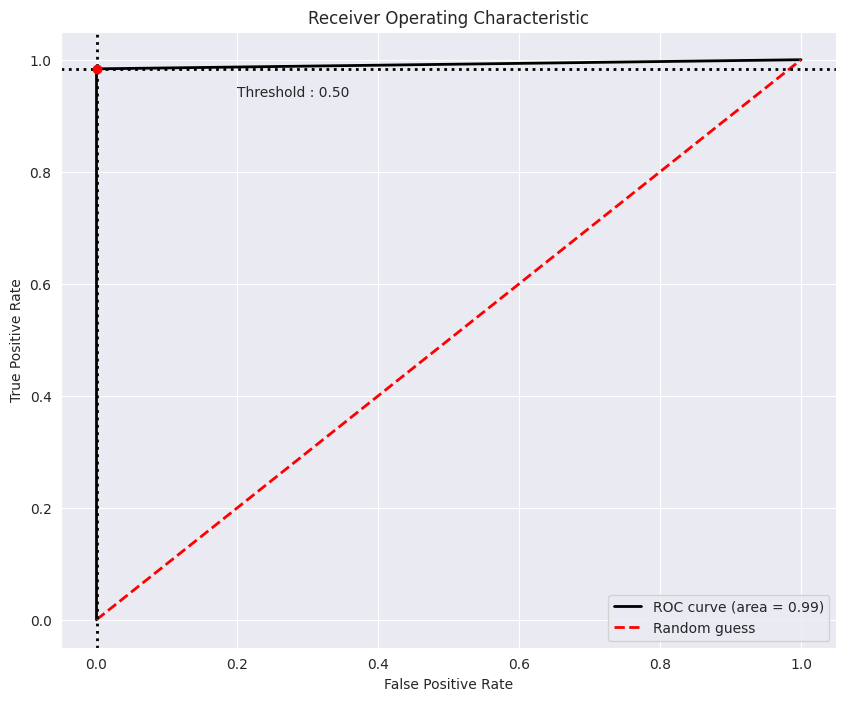

In [ ]:
# Visualisation with plot_metric - CNN-RF
false_positive_rate, true_positive_rate, _ = roc_curve(true_labels, cnn_rf_class_predictions)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

pr, tpr, thresholds = roc_curve(true_labels, cnn_rf_class_predictions)
tpr_intrp = interpolate.interp1d(thresholds, tpr)
fpr_intrp= interpolate.interp1d(thresholds, fpr)

print(f'TPR of CNN-RF model : {tpr_intrp(0.5)}')
print(f'FPR of CNN-RF model : {fpr_intrp(0.5)}')

bc = BinaryClassification(y_test1500, y_test_rf, labels=[1, 0])

# Figures
plt.figure(figsize=(10,8))
bc.plot_roc_curve()
plt.show()

#ROC CURVE for the new model

false_positive_rate: [0. 0. 1.]
true_positive_rate: [0.         0.98369565 1.        ]
TPR of CNN-RF model : 0.995108695652174
FPR of CNN-RF model : 0.7


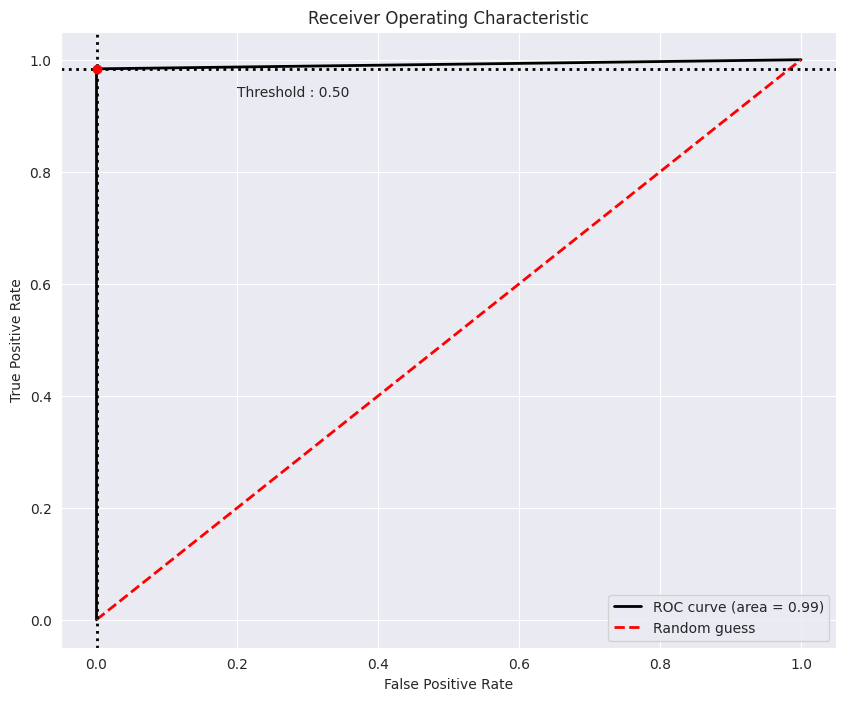

In [ ]:
# Visualisation with plot_metric
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, cnn_rf_class_predictions)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

pr, tpr, thresholds = roc_curve(y_test, cnn_rf_class_predictions)
tpr_intrp = interpolate.interp1d(thresholds, tpr)
fpr_intrp= interpolate.interp1d(thresholds, fpr)

print(f'TPR of CNN-RF model : {tpr_intrp(0.3)}')
print(f'FPR of CNN-RF model : {fpr_intrp(0.3)}')

bc = BinaryClassification(y_test, cnn_rf_class_predictions, labels=[1, 0])

# Figures
plt.figure(figsize=(10,8))
bc.plot_roc_curve()
plt.show()

#Check Precision and Recall ofthe new model

|                 |   Predicted Positive |   Predicted Negative |
|-----------------+----------------------+----------------------|
| Actual Positive |                  764 |                    0 |
| Actual Negative |                   12 |                  724 |

Precision: [0.49066667 1.         1.        ]
Recall: [1.         0.98369565 0.        ]
Thresholds: [0 1]


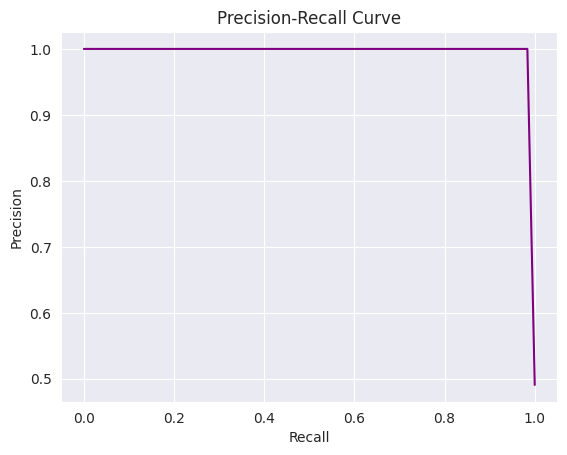

In [ ]:
matrix = confusion_matrix(y_test, cnn_rf_class_predictions)
matrix = pd.DataFrame(matrix, index=["Actual Positive", "Actual Negative"], columns = ["Predicted Positive", "Predicted Negative"])
print(tabulate(matrix, tablefmt="orgtbl",
               headers="keys"))


print()
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, cnn_rf_class_predictions)
print(f'Precision: {precision}\nRecall: {recall}\nThresholds: {thresholds}')
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#More metrics results for  the CNN-RF model

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn import metrics


#cnn_prediction=resampled_prediction;
cm1 = confusion_matrix(y_test, cnn_rf_class_predictions)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

fpr, tpr, thresholds = metrics.roc_curve(y_test, cnn_rf_class_predictions)
print("AUC",metrics.auc(fpr, tpr))

Confusion Matrix : 
 [[764   0]
 [ 12 724]]
Accuracy :  0.992
Sensitivity :  1.0
Specificity :  0.9836956521739131
AUC 0.9918478260869565


In [ ]:
from sklearn.metrics import auc
print("roc_auc score is :  ",roc_auc_score(y_test, cnn_rf_class_predictions))

f1 = f1_score(y_test, cnn_rf_class_predictions)
print("f1 score is :  ",f1)

precision, recall, thresholds = precision_recall_curve(y_test, cnn_rf_class_predictions)

print("precision-recall curve array is :  ", precision_recall_curve(y_test, cnn_rf_class_predictions))

auc = auc(recall, precision)

print("precision-recall AUC score is :  ", auc)

roc_auc score is :   0.9918478260869565
f1 score is :   0.9917808219178083
precision-recall curve array is :   (array([0.49066667, 1.        , 1.        ]), array([1.        , 0.98369565, 0.        ]), array([0, 1]))
precision-recall AUC score is :   0.9958478260869565


In [ ]:
resampled_prediction.dtype

dtype('int64')

#Make predictions using the loaded model

In [ ]:
# Assuming you have loaded your test data as 'X_row_data'

# Make predictions using the loaded model
prediction = loaded_model.predict([resampled_prediction, y_test_rf])

# Assuming your model's output is binary (0 for non-default, 1 for default)
if prediction[0][0] > 0.5:
    print("This customer is defaulting.")
else:
    print("This customer is not defaulting.")


NameError: name 'loaded_model' is not defined

In [ ]:
input_data = df_1.iloc[30010, 2:]
print(input_data)
input_data_arr = np.asarray(input_data)
# Reshape the input data to (number_of_time_steps, number_of_features)
input_data_arr_reshaped = input_data_arr.reshape(1, -1, 1)
prediction_cnn = model_cnn_1.predict(input_data_arr_reshaped)
print(prediction_cnn)
#This will reshape your input data to match the expected

\